## Setup
Please download result data from this [link](https://www.dropbox.com/s/39gvm9lnn180nap/meta_marl_result.zip?dl=0). Then, unzip and put the data in `meta_marl/notebook/data`. 

In [1]:
import seaborn as sns
import pylab as plot
import matplotlib.pyplot as plt
import numpy as np

# Set plotting
sns.set_style("ticks")
sns.set_palette(sns.color_palette("hls", 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 14}
plot.rcParams.update(params)

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

MAX_ITERATION = 20
N_SEED = 20

In [2]:
def read_key_from_log(path, key, index, i_agent=None):
    with open(path) as f:
        content = f.read().splitlines()

    data = []
    for line in content:
        target_data = None
        if key in line:
            if i_agent is not None:
                words = line.split()
                if int(words[-6][0]) == i_agent:
                    target_data = line.split()[index]
            else:
                target_data = line.split()[index]

        if target_data is not None:
            if target_data[0] == "[":
                target_data = target_data[1:-1]
            if target_data[0] == ",":
                target_data = target_data[1:-1]
            if target_data[-1] == ",":
                target_data = target_data[0:-1]

            data.append(float(target_data))

    assert len(data) > 0

    return data

In [3]:
ppo_lagrangian_cost, ppo_lagrangian_obj = [], []
for seed in range(1, 10):
    path = "./data/pointmass/seed::" + str(seed) + "_algo::ppo_lagrangian" 
    
    cost = read_key_from_log(path, key="cost", index=-1)
    if len(cost) > 300000:
        ppo_lagrangian_cost.append(np.array(cost))

    obj = read_key_from_log(path, key="return", index=-1)
    if len(obj) > 300000:    
        ppo_lagrangian_obj.append(np.array(obj))
    
ppo_lagrangian_cost = np.stack(ppo_lagrangian_cost, axis=0)[:, 0::3]
ppo_lagrangian_obj = np.stack(ppo_lagrangian_obj, axis=0)[:, 0::3]
print(ppo_lagrangian_cost.shape, ppo_lagrangian_obj.shape)

(8, 100001) (8, 100001)


In [4]:
cpo_cost, cpo_obj = [], []
for seed in range(1, 10):
    path = "./data/pointmass/seed::" + str(seed) + "_algo::cpo" 
    
    cost = read_key_from_log(path, key="cost", index=-1)
    if len(cost) > 300000:
        cpo_cost.append(np.array(cost))

    obj = read_key_from_log(path, key="return", index=-1)
    if len(obj) > 300000:    
        cpo_obj.append(np.array(obj))
    
cpo_cost = np.stack(cpo_cost, axis=0)[:, 0::3]
cpo_obj = np.stack(cpo_obj, axis=0)[:, 0::3]
print(cpo_cost.shape, cpo_obj.shape)

(9, 100001) (9, 100001)


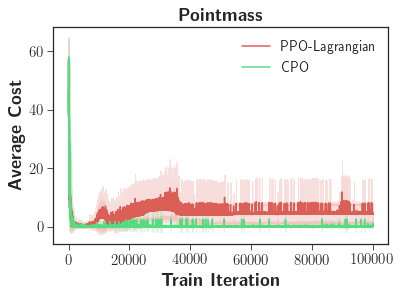

In [5]:
fig, ax = plt.subplots()
sns.set_style("ticks")

datas = [ppo_lagrangian_cost, cpo_cost]
legends = ["PPO-Lagrangian", "CPO"]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]
    
for data, legend, color in zip(datas, legends, colors):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 1.96 * std / float(np.sqrt(10))  # 95% interval
    error = (mean - confidence, mean + confidence)
    
    ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
    ax.plot(np.arange(mean.shape[0]), mean, label=legend, color=color)      
         
plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Average Cost', size=18)
plt.title(r'\textbf{Pointmass}', size=18)
plt.legend()

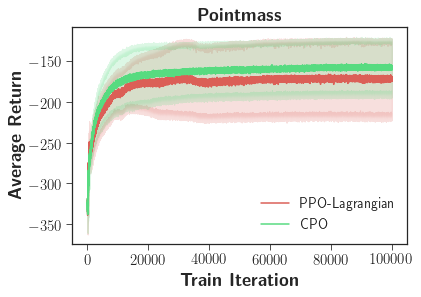

In [6]:
fig, ax = plt.subplots()
sns.set_style("ticks")

datas = [ppo_lagrangian_obj, cpo_obj]
legends = ["PPO-Lagrangian", "CPO"]
colors = [
    sns.color_palette("hls", 8)[0], 
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6]]
    
for data, legend, color in zip(datas, legends, colors):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 1.96 * std / float(np.sqrt(10))  # 95% interval
    error = (mean - confidence, mean + confidence)
    
    ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
    ax.plot(np.arange(mean.shape[0]), mean, label=legend, color=color)      
         
plt.xlabel(r'\textbf{Train Iteration}', size=18)
plt.ylabel(r'\textbf{Average Return', size=18)
plt.title(r'\textbf{Pointmass}', size=18)
plt.legend()